# Homework 2 Programming Problem 2 (5 points)

Consider the following data:

![Cubic data](https://drive.google.com/uc?id=1uXGTKAIj3Zo4C5vSACCIVkmuZoG0Pyhv)


We will perform these steps:
1. Load the data
2. Generate a design matrix
3. Solve for the regression coefficients
4. Create and plot a curve using these coefficients

First, we demonstrate the above for a linear (1st order) model. First, run each cell in the demo and follow along with each step. Your job is then to make 2nd and 3rd order models for the same data using similar techniques.

## Demonstration: Linear fit

First, we load the data in to x and y:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.2855, 0.0033, 0.8307, 0.9606, 0.8153, 0.5539, 0.5152, 0.7761,
       0.5763, 0.2697, 0.6744, 0.7998, 0.1052, 0.8674, 0.598 , 0.3985,
       0.0171, 0.1732, 0.7976, 0.4137, 0.7161, 0.7225, 0.3892, 0.0834,
       0.9733, 0.3097, 0.8509, 0.0226, 0.6901, 0.2235, 0.5914, 0.5436,
       0.7189, 0.4558, 0.8366, 0.534 , 0.214 , 0.9314, 0.4065, 0.788 ])

y = np.array([ 0.6603, -0.5925,  0.2045,  0.3698,  0.191 ,  0.496 ,  0.4986,
        0.2516,  0.3905,  0.5932,  0.2924,  0.219 ,  0.0287,  0.2024,
        0.4489,  0.6237, -0.4857,  0.3384,  0.162 ,  0.6694,  0.2539,
        0.1936,  0.6322, -0.0953,  0.4632,  0.6721,  0.2464, -0.4672,
        0.2746,  0.5087,  0.3691,  0.4559,  0.2021,  0.5797,  0.2531,
        0.5417,  0.4577,  0.2952,  0.5856,  0.1818])


Now we generate a linear design matrix for the data:

In [2]:
# Function to get a linear design matrix for 1D data
def get_linear_design_matrix(x):
    x = x.reshape(-1, 1)                # Turn x into a column array
    columns = [x, np.ones_like(x)]      # Linear design matrix has a column of x and a column of ones
    X = np.concatenate(columns, axis=1) # Combine each column horizontally to make a matrix
    return X

In [3]:
X = get_linear_design_matrix(x)
print("First four rows of X:")
print(X[:4,:])

First four rows of X:
[[0.2855 1.    ]
 [0.0033 1.    ]
 [0.8307 1.    ]
 [0.9606 1.    ]]


Now that we have the design matrix $X$ and the output $y$, we can solve for the coefficients $w$ such that $X w \approx y$ using:
$$
w = (X'\, X)^{-1}\, X'\, y
$$

Note the use of the following in Python:
- `@` for matrix multiplication
- `np.inv(A)` for inversion of matrix `A`
- `A.T` for transpose of a matrix `A`
- `b.reshape(-1,1)` to treat 1D array `b` as a column


In [4]:
# Get coefficients 
w = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
print("Linear Coefficients:", w.flatten())

Linear Coefficients: [0.26080739 0.16441038]


Next, we write a plotting function to plot data and our least squares regression on the same axes. To apply our regression we can call the `get_linear_design_matrix()` function on a new set of x values and multiply the result by our coefficients `w`.

In [5]:
def plot_data_with_regression(x_data, y_data, x_reg, y_reg):
    plt.figure()

    plt.scatter(x_data, y_data, label="Data", c="black")
    plt.plot(x_reg, y_reg, label="Fit")

    plt.legend()
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$y$")
    plt.show()

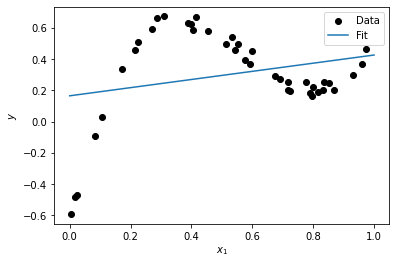

In [6]:
x_fit = np.linspace(0, 1, 100)                # x values for fit line
y_fit = get_linear_design_matrix(x_fit) @ w   # y values for fit line

plot_data_with_regression(x, y, x_fit, y_fit)

## Your turn: Second order polynomial

Now you will solve the same problem, but with a quadratic polynomial instead of linear. We need to write a new function to generate a design matrix.

Replace the commented code below:

In [7]:
def get_quadratic_design_matrix(x): # x is an 1D array 
    # YOUR CODE GOES HERE
    # GENERATE A DESIGN MATRIX WITH 2ND ORDER FEATURES: X
    x = x.reshape(-1, 1) # convert x to column matrix
    x_sq = x**2
    X = np.concatenate([x_sq, x, np.ones_like(x)], axis= 1)
    print(X.shape)
    return X

In [8]:
# Create X
X = get_quadratic_design_matrix(x)
print("First four rows of X:")
print(X[:4,:])

(40, 3)
First four rows of X:
[[8.1510250e-02 2.8550000e-01 1.0000000e+00]
 [1.0890000e-05 3.3000000e-03 1.0000000e+00]
 [6.9006249e-01 8.3070000e-01 1.0000000e+00]
 [9.2275236e-01 9.6060000e-01 1.0000000e+00]]


Compute the `w` coefficients with a pseudo-inverse as in the example:

In [9]:
# YOUR CODE GOES HERE
# COMPUTE COEFFICIENTS w
w = np.linalg.inv(X.T @ X) @ X.T @ y # 3 x 1
print(w.shape)
print("Quadratic Coefficients:", w.flatten())




(3,)
Quadratic Coefficients: [-2.84999306  3.03972629 -0.27780147]


Now plot by generating a regression curve and calling the `plot_data_with_regression()` function:

(100, 3)


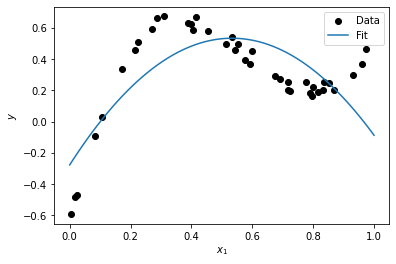

In [10]:
# YOUR CODE GOES HERE
# PLOT
def quadratic_fitting(X,w):
    return X @ w


y_quad_fit = quadratic_fitting(get_quadratic_design_matrix(x_fit), w)
plot_data_with_regression(x, y, x_fit, y_quad_fit)



## 3rd Order Polynomial

Here we go through the same steps as above, but this time we perform a cubic polynomial fit. Once again, fill in the necessary code:

In [11]:
def get_cubic_design_matrix(x):
    # YOUR CODE GOES HERE
    # GENERATE A DESIGN MATRIX WITH 3RD ORDER FEATURES: X
    x = x.reshape(-1, 1)
    x_sq = x**2
    x_cub = x**3
    X = np.concatenate([x_cub, x_sq, x, np.ones_like(x)], axis= 1)
    print(X.shape)
    return X

In [12]:
X = get_cubic_design_matrix(x)
print("First four rows of X:")
print(X[:4,:]) # 40 x 4

(40, 4)
First four rows of X:
[[2.32711764e-02 8.15102500e-02 2.85500000e-01 1.00000000e+00]
 [3.59370000e-08 1.08900000e-05 3.30000000e-03 1.00000000e+00]
 [5.73234910e-01 6.90062490e-01 8.30700000e-01 1.00000000e+00]
 [8.86395917e-01 9.22752360e-01 9.60600000e-01 1.00000000e+00]]


In [13]:
# YOUR CODE GOES HERE
# COMPUTE COEFFICIENTS w
w_cub = np.linalg.inv(X.T @ X) @ X.T @ y 
print(w.shape) # 4x1
print("Cubic Coefficients:", w.flatten())

(3,)
Cubic Coefficients: [-2.84999306  3.03972629 -0.27780147]


(100, 4)


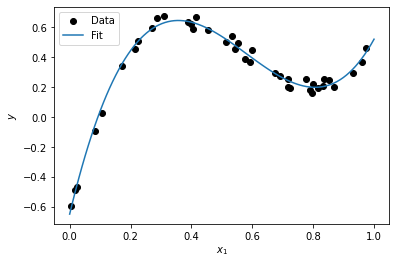

In [14]:
# YOUR CODE GOES HERE
# PLOT
X_cub_fit = get_cubic_design_matrix(x_fit)
y_cub_fit = X_cub_fit @ w_cub

plot_data_with_regression(x, y, x_fit, y_cub_fit)
